In [1]:
import numpy as np
import pandas as pd
from numpy import genfromtxt
import matplotlib.pyplot as plt
%matplotlib inline

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

## Dataset 1

In [2]:
# Loading the dataset
data = pd.read_csv('datasets/network_backup_dataset.csv')

# creating a pandas dataframe
df = pd.DataFrame(data)

df_np = df.values

# Converting 'o' dtype to 'str'
# df['Day of Week'] = df['Day of Week'].astype('str') 


In [3]:
Week_idx = df.iloc[:, [0]]
Day = df.iloc[:, [1]]
bkp_start_time = df.iloc[:, [2]]
workflow_ID = df.iloc[:, [3]]
File_name = df.iloc[:, [4]]
bkp_size = df.iloc[:, [5]]
bkp_time = df.iloc[:, [6]]

In [4]:
#Converting all of the above columns to numpy arrays
Week_idx = np.concatenate(Week_idx.values, axis=0)
Day = np.concatenate(Day.values, axis=0)
bkp_start_time = np.concatenate(bkp_start_time.values, axis=0)
workflow_ID = np.concatenate(workflow_ID.values, axis=0)
File_name = np.concatenate(File_name.values, axis=0)
bkp_size = np.concatenate(bkp_size.values, axis=0)
bkp_time = np.concatenate(bkp_time.values, axis=0)


In [5]:
# Finding the end of 20 day period
i = 0
j = 0
while i < len(Week_idx):
    if (Week_idx[i] == 3) and (Day[i] == 'Sunday'):
        twenty_days = i - 1
        break
    i = i + 1

print("Twenty Day index: {}".format(twenty_days))

Twenty Day index: 3537


In [6]:
# Calculating number of days
i = 0
j = 1
current = Day[0]
day_idx = np.zeros(len(Week_idx))
while i < len(Week_idx):
    day_idx[i] = j
    if Day[i] != current:
        j = j + 1
        current = Day[i]
    if j == 106:
        break
    i = i + 1
        

In [7]:
def sum_days(w, indices):
    summed = []
    new_indices = []
    sum_ = 0
    current_i = None
    for idx, i in enumerate(indices):
        if current_i != i:
            if current_i is not None:
                summed.append(sum_)
                new_indices.append(current_i)
                
            current_i = int(i)
            sum_ = w[idx]
        else:
            # current i matches, sum them
            sum_ += w[idx]
            
    return summed, new_indices

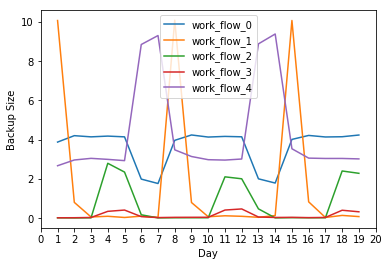

In [8]:
# Plot for 20 days

i = 0
y_idx = np.zeros(twenty_days+1)
colors = np.empty(twenty_days+1, dtype = str)
w_0 = np.zeros(twenty_days+1)
w_1 = np.zeros(twenty_days+1)
w_2 = np.zeros(twenty_days+1)
w_3 = np.zeros(twenty_days+1)
w_4 = np.zeros(twenty_days+1)
while i <= twenty_days:
    y_idx[i] = i
    if workflow_ID[i] == 'work_flow_0':
        w_0[i] = bkp_size[i]
        colors[i] = "g" 
    elif workflow_ID[i] == 'work_flow_1':
        w_1[i] = bkp_size[i]
        colors[i] = "r" 
    elif workflow_ID[i] == 'work_flow_2':
        w_2[i] = bkp_size[i]
        colors[i] = "c"
    elif workflow_ID[i] == 'work_flow_3':
        w_3[i] = bkp_size[i]
        colors[i] = "b"
    elif workflow_ID[i] == 'work_flow_4':
        w_4[i] = bkp_size[i]
        colors[i] = "k"
    i = i + 1
# plt.plot(y_idx, bkp_size[:twenty_days+1])

summed, new_indices = sum_days(w_0, day_idx[:twenty_days+1])
plt.plot(new_indices, summed)

summed, new_indices = sum_days(w_1, day_idx[:twenty_days+1])
plt.plot(new_indices, summed)

summed, new_indices = sum_days(w_2, day_idx[:twenty_days+1])
plt.plot(new_indices, summed)

summed, new_indices = sum_days(w_3, day_idx[:twenty_days+1])
plt.plot(new_indices, summed)

summed, new_indices = sum_days(w_4, day_idx[:twenty_days+1])
plt.plot(new_indices, summed)

plt.xticks(np.arange(21, step=1))

plt.xlabel('Day')
plt.ylabel('Backup Size')
plt.legend(['work_flow_0', 'work_flow_1', 'work_flow_2', 'work_flow_3', 'work_flow_4'])
plt.show()

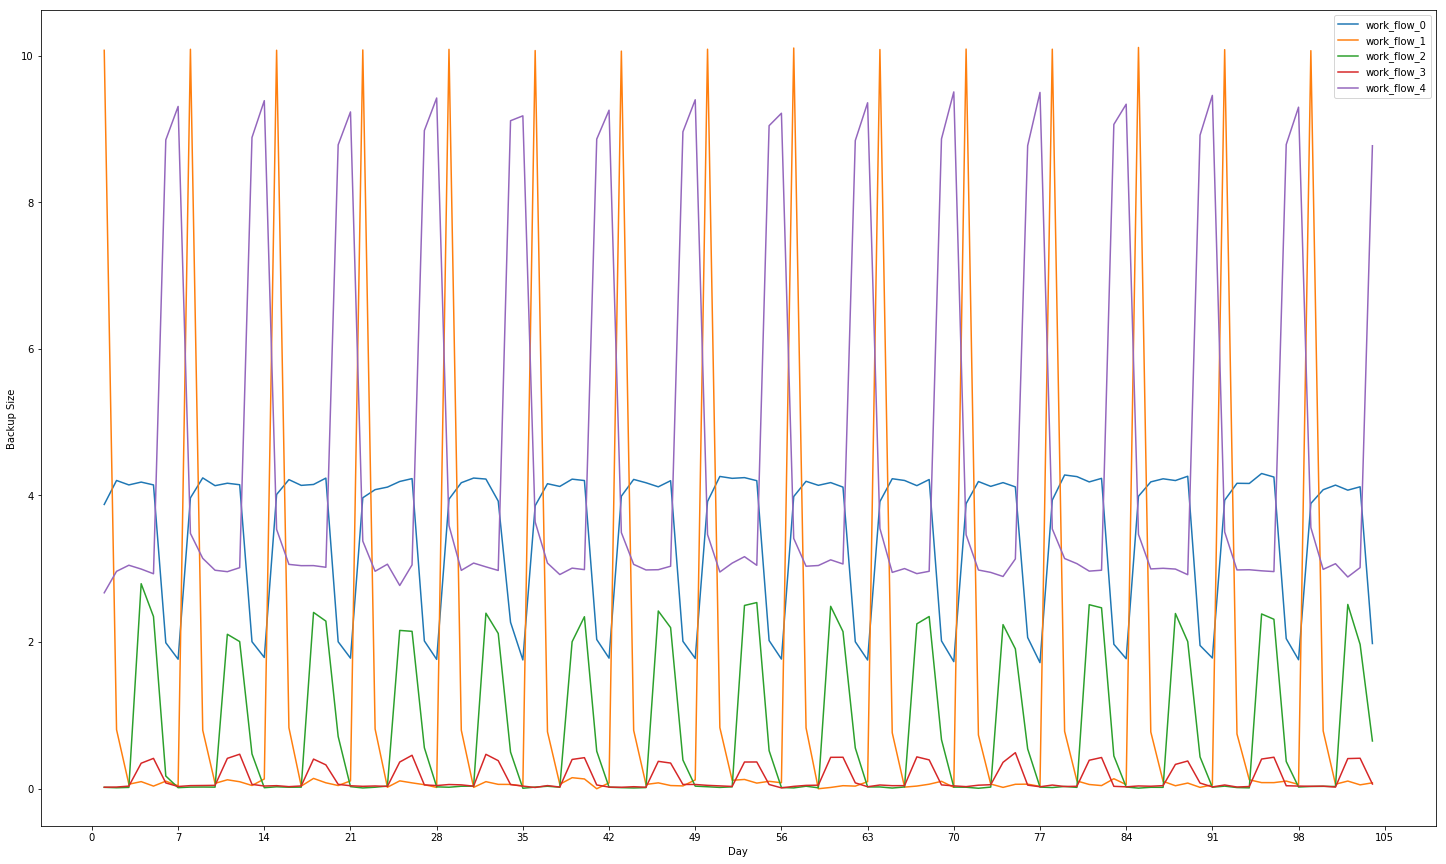

In [9]:
# Plot for 105 days

total_idx = len(Week_idx)
i = 0
y_idx = np.zeros(total_idx)
colors = np.empty(total_idx, dtype = str)
w_0 = np.zeros(total_idx)
w_1 = np.zeros(total_idx)
w_2 = np.zeros(total_idx)
w_3 = np.zeros(total_idx)
w_4 = np.zeros(total_idx)
# w_0[:] = np.nan
# w_1[:] = np.nan
# w_2[:] = np.nan
# w_3[:] = np.nan
# w_4[:] = np.nan
while i < total_idx:
    y_idx[i] = i
    if workflow_ID[i] == 'work_flow_0':
        w_0[i] = w_0[i] + bkp_size[i]
        colors[i] = "g" 
    elif workflow_ID[i] == 'work_flow_1':
        w_1[i] = w_1[i] + bkp_size[i]
        colors[i] = "r" 
    elif workflow_ID[i] == 'work_flow_2':
        w_2[i] = w_2[i] + bkp_size[i]
        colors[i] = "c"
    elif workflow_ID[i] == 'work_flow_3':
        w_3[i] = w_3[i] + bkp_size[i]
        colors[i] = "b"
    elif workflow_ID[i] == 'work_flow_4':
        w_4[i] = w_4[i] + bkp_size[i]
        colors[i] = "k"
    i = i + 1
# plt.plot(y_idx, bkp_size[:total_idx])
plt.figure(figsize=(25,15))

summed, new_indices = sum_days(w_0[np.isfinite(w_0)], day_idx[np.isfinite(w_0)])
plt.plot(new_indices, summed)

summed, new_indices = sum_days(w_1[np.isfinite(w_1)], day_idx[np.isfinite(w_1)])
plt.plot(new_indices, summed)

summed, new_indices = sum_days(w_2[np.isfinite(w_2)], day_idx[np.isfinite(w_2)])
plt.plot(new_indices, summed)

summed, new_indices = sum_days(w_3[np.isfinite(w_3)], day_idx[np.isfinite(w_3)])
plt.plot(new_indices, summed)

summed, new_indices = sum_days(w_4[np.isfinite(w_4)], day_idx[np.isfinite(w_4)])
plt.plot(new_indices, summed)

plt.xticks(np.arange(106, step=7))
plt.xlabel('Day')
plt.ylabel('Backup Size')
plt.legend(['work_flow_0', 'work_flow_1', 'work_flow_2', 'work_flow_3', 'work_flow_4'])
plt.show()

## Scalar Encoding

In [10]:
# Scalar encoding

# Days
i = 0
Day_encoded = np.zeros(len(Week_idx))
while i < len(Week_idx):
    if Day[i] == 'Monday':
        Day_encoded[i] = 1
    if Day[i] == 'Tuesday':
        Day_encoded[i] = 2
    if Day[i] == 'Wednesday':
        Day_encoded[i] = 3
    if Day[i] == 'Thursday':
        Day_encoded[i] = 4
    if Day[i] == 'Friday':
        Day_encoded[i] = 5
    if Day[i] == 'Saturday':
        Day_encoded[i] = 6
    if Day[i] == 'Sunday':
        Day_encoded[i] = 7
    i = i + 1
    
# workflow_ID
i = 0
workflow_encoded = np.zeros(len(Week_idx))
while i < len(Week_idx):
    if workflow_ID[i] == 'work_flow_0':
        workflow_encoded[i] = 0
    elif workflow_ID[i] == 'work_flow_1':
        workflow_encoded[i] = 1
    elif workflow_ID[i] == 'work_flow_2':
        workflow_encoded[i] = 2
    elif workflow_ID[i] == 'work_flow_3':
        workflow_encoded[i] = 3
    elif workflow_ID[i] == 'work_flow_4':
        workflow_encoded[i] = 4
    i = i + 1

# hour of the day
hour_encoded = bkp_start_time

# week number
Week_encoded = Week_idx

# backup size
size_encoded = bkp_size

# File name
i = 0
file_name_encoded = np.zeros(len(Week_idx))
while i < len(Week_idx):
    file_name_encoded[i] = int(File_name[i][5:8])
    i = i + 1

# Combine all into 1
X_encoded = np.hstack((Day_encoded.reshape(-1,1), workflow_encoded.reshape(-1,1)))
X_encoded = np.hstack((X_encoded, hour_encoded.reshape(-1,1)))
X_encoded = np.hstack((X_encoded, Week_encoded.reshape(-1,1)))
X_encoded = np.hstack((X_encoded, file_name_encoded.reshape(-1,1)))    

# Y encoded
Y_encoded = size_encoded.reshape(-1,1)

## Linear Regression

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from math import sqrt

In [12]:
model = LinearRegression()
num_folds = 10

# randomly shuffling arrays
randomize = np.arange(len(X_encoded))
np.random.shuffle(randomize)
X_encoded = X_encoded[randomize]
Y_encoded = Y_encoded[randomize]

In [13]:
kf = KFold(n_splits=num_folds)
rmse_per_fold_train = []
rmse_per_fold_test = []
i = 0
for trainset, testset in kf.split(X_encoded):
    X_train, X_test = X_encoded[trainset], X_encoded[testset]
    y_train, y_test = Y_encoded[trainset], Y_encoded[testset]
    model.fit(X_train, y_train)
#     rmse_per_fold_train.append(sqrt(mean_squared_error(y_train, model.predict(X_train))))
#     rmse_per_fold_test.append(sqrt(mean_squared_error(y_test, model.predict(X_test))))
    rmse_per_fold_train.append(mean_squared_error(y_train, model.predict(X_train)))
    rmse_per_fold_test.append(mean_squared_error(y_test, model.predict(X_test)))
    print('RMSE Training for fold {} = {}'.format(i, sqrt(mean_squared_error(y_train, model.predict(X_train)))))
    print('RMSE Testing for fold {} = {}'.format(i, sqrt(mean_squared_error(y_test, model.predict(X_test)))))
    i = i + 1
    

RMSE Training for fold 0 = 0.10383514516938071
RMSE Testing for fold 0 = 0.10136926029605739
RMSE Training for fold 1 = 0.10320304523115809
RMSE Testing for fold 1 = 0.10702088588672491
RMSE Training for fold 2 = 0.10345384193686916
RMSE Testing for fold 2 = 0.1048277271834225
RMSE Training for fold 3 = 0.10379187004588959
RMSE Testing for fold 3 = 0.10179279030904777
RMSE Training for fold 4 = 0.10162848882091632
RMSE Testing for fold 4 = 0.11984968283308069
RMSE Training for fold 5 = 0.10349079834079379
RMSE Testing for fold 5 = 0.10448081441247732
RMSE Training for fold 6 = 0.1043754263307968
RMSE Testing for fold 6 = 0.09627651568844682
RMSE Training for fold 7 = 0.10412128291915991
RMSE Testing for fold 7 = 0.09869521166575014
RMSE Training for fold 8 = 0.10367895630534606
RMSE Testing for fold 8 = 0.10278984771922876
RMSE Training for fold 9 = 0.10427192106072658
RMSE Testing for fold 9 = 0.09724457039121995


In [14]:
# print('Average RMSE Training = {}'.format(np.mean(rmse_per_fold_train)))
# print('Average RMSE Testing = {}'.format(np.mean(rmse_per_fold_test)))
print('Average RMSE Training = {}'.format(np.sqrt(np.mean(rmse_per_fold_train))))
print('Average RMSE Testing = {}'.format(np.sqrt(np.mean(rmse_per_fold_test))))

Average RMSE Training = 0.10358773159907397
Average RMSE Testing = 0.10363019834649925


#### Scatter Plots

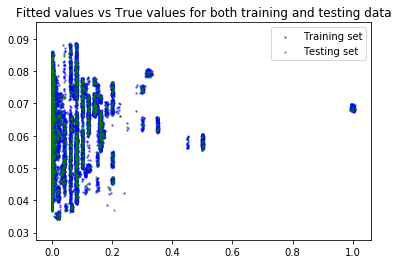

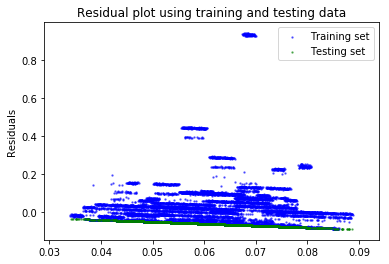

In [15]:

X_train, X_test, y_train, y_test = train_test_split(X_encoded, Y_encoded, test_size=0.1, random_state=1)

model.fit(X_train, y_train)

pred_train = model.predict(X_train)


# Fitted values vs true values
plt.scatter(y_train, model.predict(X_train), c='b', s=2, alpha=0.5)
plt.scatter(y_test, model.predict(X_test), c='g', s=2, alpha=0.5)
# plt.hlines(y=0,xmin=0,xmax=50)
plt.title('Fitted values vs True values for both training and testing data')
# plt.ylabel('Residuals')
plt.legend(['Training set', 'Testing set'])

plt.figure()
# Residuals vs Fitted values
plt.scatter(model.predict(X_train), y_train - model.predict(X_train), c='b', s=2, alpha=0.5)
plt.scatter(model.predict(X_test), y_test - model.predict(X_test) - y_test, c='g', s=2, alpha=0.5)
# plt.hlines(y=0,xmin=0,xmax=50)
plt.title('Residual plot using training and testing data')
plt.ylabel('Residuals')
plt.legend(['Training set', 'Testing set'])
# predicted_Y = model.predict(X_encoded)

# residual_values = np.linalg.norm(Y_encoded - model.predict(X_encoded)) ** 2

## Random Forest

In [16]:
from sklearn.ensemble import RandomForestRegressor

In [17]:
# Parameters for RadomForestRegressor
Num_trees = 20
Depth_trees = 4
Bootstrap = True
Max_features = 5

In [18]:
model = RandomForestRegressor(n_estimators = Num_trees, max_features = Max_features, 
                              max_depth = Depth_trees, bootstrap = Bootstrap, oob_score=True)
num_folds = 10

Y_encoded_rf = Y_encoded.ravel()


## (2) i

In [19]:
kf = KFold(n_splits=num_folds)
rmse_per_fold_train = []
rmse_per_fold_test = []
oob_error_per_fold = []
i = 0
for trainset, testset in kf.split(X_encoded):
    X_train, X_test = X_encoded[trainset], X_encoded[testset]
    y_train, y_test = Y_encoded_rf[trainset], Y_encoded_rf[testset]
    model.fit(X_train, y_train)
#     rmse_per_fold_train.append(sqrt(mean_squared_error(y_train, model.predict(X_train))))
#     rmse_per_fold_test.append(sqrt(mean_squared_error(y_test, model.predict(X_test))))
    rmse_per_fold_train.append(mean_squared_error(y_train, model.predict(X_train)))
    rmse_per_fold_test.append(mean_squared_error(y_test, model.predict(X_test)))
    oob_error = 1 - model.oob_score_
    oob_error_per_fold.append(oob_error)
    print('----------------------------------------------------')
    print('RMSE Training for fold {} = {}'.format(i, sqrt(mean_squared_error(y_train, model.predict(X_train)))))
    print('RMSE Testing for fold {} = {}'.format(i, sqrt(mean_squared_error(y_test, model.predict(X_test)))))
    print('Out of Bag error for fold {} = {}'.format(i, oob_error))
    print('----------------------------------------------------')
    i = i + 1

----------------------------------------------------
RMSE Training for fold 0 = 0.06051150429070006
RMSE Testing for fold 0 = 0.05650018613312749
Out of Bag error for fold 0 = 0.33792556644744876
----------------------------------------------------
----------------------------------------------------
RMSE Training for fold 1 = 0.060773535294644354
RMSE Testing for fold 1 = 0.06161003516200311
Out of Bag error for fold 1 = 0.34401098577239386
----------------------------------------------------
----------------------------------------------------
RMSE Training for fold 2 = 0.0601475598534087
RMSE Testing for fold 2 = 0.06651479397554104
Out of Bag error for fold 2 = 0.33473472134165605
----------------------------------------------------
----------------------------------------------------
RMSE Training for fold 3 = 0.06088642968327481
RMSE Testing for fold 3 = 0.06061024666103701
Out of Bag error for fold 3 = 0.3405567533717887
----------------------------------------------------
-----

In [20]:
print('Average RMSE Training = {}'.format(np.sqrt(np.mean(rmse_per_fold_train))))
print('Average RMSE Testing = {}'.format(np.sqrt(np.mean(rmse_per_fold_test))))
print('Average Out of Bag Error = {}'.format(np.mean(oob_error_per_fold)))

Average RMSE Training = 0.06045124610304648
Average RMSE Testing = 0.06052941819909584
Average Out of Bag Error = 0.3386160498226893


## (2) ii

In [21]:
features_array = np.arange(1,6)
trees_array = np.arange(1,201)

-----------------------------------------------------
Number of trees = 1
Number of features = 1
RMSE Training = 0.08627925272442302
RMSE Testing = 0.0868486447872463
Out of Bag error = 1.1034636474671042
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 2
Number of features = 1
RMSE Training = 0.08266197179570406
RMSE Testing = 0.08252432358833542
Out of Bag error = 0.9445777226203125
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 3
Number of features = 1
RMSE Training = 0.07652214062882812
RMSE Testing = 0.07772257059759369
Out of Bag error = 0.8011783959585783
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 4
Number of features = 1
RMSE Training = 0.07750401760750411
RMSE Testing = 0.07853913104676012
Out of Bag error = 0.7390051829041783
---------------

-----------------------------------------------------
Number of trees = 33
Number of features = 1
RMSE Training = 0.07611782090617088
RMSE Testing = 0.07627635852490416
Out of Bag error = 0.5444158956386427
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 34
Number of features = 1
RMSE Training = 0.07611573554617708
RMSE Testing = 0.07648403030224576
Out of Bag error = 0.5463348882096644
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 35
Number of features = 1
RMSE Training = 0.07461442235545834
RMSE Testing = 0.07480829494198889
Out of Bag error = 0.52367726389174
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 36
Number of features = 1
RMSE Training = 0.07640589653687346
RMSE Testing = 0.07664421476707754
Out of Bag error = 0.5486377159491307
------------

-----------------------------------------------------
Number of trees = 65
Number of features = 1
RMSE Training = 0.07536154294081218
RMSE Testing = 0.07548920839937458
Out of Bag error = 0.5307897743970068
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 66
Number of features = 1
RMSE Training = 0.07594971912220734
RMSE Testing = 0.0762477166392929
Out of Bag error = 0.5395921702526137
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 67
Number of features = 1
RMSE Training = 0.07574836731668823
RMSE Testing = 0.0759744624978148
Out of Bag error = 0.5365589666520092
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 68
Number of features = 1
RMSE Training = 0.07513068432229292
RMSE Testing = 0.0755237285232673
Out of Bag error = 0.527377196675894
--------------

-----------------------------------------------------
Number of trees = 97
Number of features = 1
RMSE Training = 0.07595436380300187
RMSE Testing = 0.07625120737390874
Out of Bag error = 0.5380672946484603
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 98
Number of features = 1
RMSE Training = 0.07564905643713482
RMSE Testing = 0.07593759047288351
Out of Bag error = 0.5335576902645214
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 99
Number of features = 1
RMSE Training = 0.07509604843484784
RMSE Testing = 0.07512314118910393
Out of Bag error = 0.5259368484649036
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 100
Number of features = 1
RMSE Training = 0.07563342569095795
RMSE Testing = 0.07584538618727349
Out of Bag error = 0.5323158672505095
---------

-----------------------------------------------------
Number of trees = 129
Number of features = 1
RMSE Training = 0.07566037561368553
RMSE Testing = 0.07607370041017283
Out of Bag error = 0.5332528508867849
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 130
Number of features = 1
RMSE Training = 0.07595502514094014
RMSE Testing = 0.07605220830287025
Out of Bag error = 0.537646128420051
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 131
Number of features = 1
RMSE Training = 0.07569961562472656
RMSE Testing = 0.07589712163771768
Out of Bag error = 0.5331812739844335
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 132
Number of features = 1
RMSE Training = 0.07522496354185751
RMSE Testing = 0.07538255423722166
Out of Bag error = 0.5272673446425276
-------

-----------------------------------------------------
Number of trees = 161
Number of features = 1
RMSE Training = 0.07567203086863698
RMSE Testing = 0.07575539879298196
Out of Bag error = 0.5322230765749272
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 162
Number of features = 1
RMSE Training = 0.07576284751504365
RMSE Testing = 0.07596123262109962
Out of Bag error = 0.5346922985552421
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 163
Number of features = 1
RMSE Training = 0.07576604192830506
RMSE Testing = 0.0758430728860816
Out of Bag error = 0.5340178580026596
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 164
Number of features = 1
RMSE Training = 0.07593037002670558
RMSE Testing = 0.07622378210951085
Out of Bag error = 0.535707410948958
--------

-----------------------------------------------------
Number of trees = 193
Number of features = 1
RMSE Training = 0.07550421176841843
RMSE Testing = 0.07564706739505911
Out of Bag error = 0.5296727510280521
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 194
Number of features = 1
RMSE Training = 0.07553810303418135
RMSE Testing = 0.07574418734652207
Out of Bag error = 0.5308070069329364
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 195
Number of features = 1
RMSE Training = 0.07534447194248324
RMSE Testing = 0.07547649084191368
Out of Bag error = 0.5281440511729923
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 196
Number of features = 1
RMSE Training = 0.07574313055797297
RMSE Testing = 0.07593164044236926
Out of Bag error = 0.5334855224620412
------

-----------------------------------------------------
Number of trees = 25
Number of features = 2
RMSE Training = 0.06515403417062832
RMSE Testing = 0.06524484668064896
Out of Bag error = 0.40518614599996194
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 26
Number of features = 2
RMSE Training = 0.0647120515258424
RMSE Testing = 0.06496220721998124
Out of Bag error = 0.3977481933463478
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 27
Number of features = 2
RMSE Training = 0.06427762389147774
RMSE Testing = 0.06426433150132806
Out of Bag error = 0.39140931217665653
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 28
Number of features = 2
RMSE Training = 0.06495952554856353
RMSE Testing = 0.06495420454783686
Out of Bag error = 0.40202512116335126
--------

-----------------------------------------------------
Number of trees = 57
Number of features = 2
RMSE Training = 0.06438011851511768
RMSE Testing = 0.06478543015972442
Out of Bag error = 0.39001136119994595
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 58
Number of features = 2
RMSE Training = 0.06418541224378824
RMSE Testing = 0.06423723060830663
Out of Bag error = 0.3858464937665418
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 59
Number of features = 2
RMSE Training = 0.06431136408719451
RMSE Testing = 0.0646451877399112
Out of Bag error = 0.38767719423449687
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 60
Number of features = 2
RMSE Training = 0.06499905624991655
RMSE Testing = 0.06527991515431883
Out of Bag error = 0.396600568488903
----------

-----------------------------------------------------
Number of trees = 89
Number of features = 2
RMSE Training = 0.06446904651049425
RMSE Testing = 0.06479542741667607
Out of Bag error = 0.389163486512453
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 90
Number of features = 2
RMSE Training = 0.06356445276714054
RMSE Testing = 0.06375650116429683
Out of Bag error = 0.37759965185749056
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 91
Number of features = 2
RMSE Training = 0.06376977106202737
RMSE Testing = 0.06417160589571982
Out of Bag error = 0.3797944925883545
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 92
Number of features = 2
RMSE Training = 0.06384907545142413
RMSE Testing = 0.06399116886289308
Out of Bag error = 0.3809489529604087
----------

-----------------------------------------------------
Number of trees = 121
Number of features = 2
RMSE Training = 0.06428135662318585
RMSE Testing = 0.0645241366682312
Out of Bag error = 0.38646414697169906
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 122
Number of features = 2
RMSE Training = 0.06417763281447109
RMSE Testing = 0.06425244819400922
Out of Bag error = 0.3840523951091229
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 123
Number of features = 2
RMSE Training = 0.06435576876399907
RMSE Testing = 0.06445407543154621
Out of Bag error = 0.3859433731827372
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 124
Number of features = 2
RMSE Training = 0.06487048004616203
RMSE Testing = 0.06506699587724159
Out of Bag error = 0.3920166684281322
------

-----------------------------------------------------
Number of trees = 153
Number of features = 2
RMSE Training = 0.06418393271442183
RMSE Testing = 0.0643990255816908
Out of Bag error = 0.3835768043874499
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 154
Number of features = 2
RMSE Training = 0.06475201721498978
RMSE Testing = 0.06501845921622018
Out of Bag error = 0.39160759016774227
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 155
Number of features = 2
RMSE Training = 0.06451249214438552
RMSE Testing = 0.06475658389602676
Out of Bag error = 0.38784533003364624
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 156
Number of features = 2
RMSE Training = 0.0640271871974067
RMSE Testing = 0.0641332174894009
Out of Bag error = 0.38141153855957016
------

-----------------------------------------------------
Number of trees = 185
Number of features = 2
RMSE Training = 0.06446277152304276
RMSE Testing = 0.06474603257962294
Out of Bag error = 0.3865113329303244
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 186
Number of features = 2
RMSE Training = 0.06421166924352525
RMSE Testing = 0.0645080994275902
Out of Bag error = 0.38371721451388563
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 187
Number of features = 2
RMSE Training = 0.06454213216572605
RMSE Testing = 0.06477712098166806
Out of Bag error = 0.3881891359964204
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 188
Number of features = 2
RMSE Training = 0.06456787057784029
RMSE Testing = 0.06470016000110486
Out of Bag error = 0.38840951716894134
-----

-----------------------------------------------------
Number of trees = 17
Number of features = 3
RMSE Training = 0.06127713330279853
RMSE Testing = 0.061347473865711495
Out of Bag error = 0.35916216449959665
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 18
Number of features = 3
RMSE Training = 0.06034899406961714
RMSE Testing = 0.060708522371713716
Out of Bag error = 0.3497215370895389
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 19
Number of features = 3
RMSE Training = 0.060711266329443056
RMSE Testing = 0.060531274546235664
Out of Bag error = 0.35166240348588185
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 20
Number of features = 3
RMSE Training = 0.06043060285040663
RMSE Testing = 0.06069121259839237
Out of Bag error = 0.34667645049546997
---

-----------------------------------------------------
Number of trees = 49
Number of features = 3
RMSE Training = 0.06125156442789675
RMSE Testing = 0.06134411654719709
Out of Bag error = 0.35183608024048346
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 50
Number of features = 3
RMSE Training = 0.06039902875139198
RMSE Testing = 0.060529328522712554
Out of Bag error = 0.34076264100441
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 51
Number of features = 3
RMSE Training = 0.06013125433223887
RMSE Testing = 0.0604365906053064
Out of Bag error = 0.3382372870497112
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 52
Number of features = 3
RMSE Training = 0.06002538004997157
RMSE Testing = 0.060296141724341674
Out of Bag error = 0.33678234642010885
---------

-----------------------------------------------------
Number of trees = 81
Number of features = 3
RMSE Training = 0.06026072434682758
RMSE Testing = 0.06058910764523353
Out of Bag error = 0.3383374352449232
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 82
Number of features = 3
RMSE Training = 0.06052224576174711
RMSE Testing = 0.060594643725950914
Out of Bag error = 0.34149964395774585
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 83
Number of features = 3
RMSE Training = 0.06032035000748347
RMSE Testing = 0.06053680660419232
Out of Bag error = 0.3402086528244115
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 84
Number of features = 3
RMSE Training = 0.060494732469513215
RMSE Testing = 0.06082351383677498
Out of Bag error = 0.34107087047962553
------

-----------------------------------------------------
Number of trees = 113
Number of features = 3
RMSE Training = 0.06005038138362198
RMSE Testing = 0.06020164248850332
Out of Bag error = 0.3356626133707247
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 114
Number of features = 3
RMSE Training = 0.06026038162238405
RMSE Testing = 0.06047513203421573
Out of Bag error = 0.33810720856577126
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 115
Number of features = 3
RMSE Training = 0.06014325898974329
RMSE Testing = 0.060347883287887434
Out of Bag error = 0.33690431340442506
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 116
Number of features = 3
RMSE Training = 0.060193915637682796
RMSE Testing = 0.06030913248176049
Out of Bag error = 0.33673917436441575
-

-----------------------------------------------------
Number of trees = 145
Number of features = 3
RMSE Training = 0.06029116337940353
RMSE Testing = 0.06042622576249821
Out of Bag error = 0.3381570930450781
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 146
Number of features = 3
RMSE Training = 0.06044560624756822
RMSE Testing = 0.060520102022188896
Out of Bag error = 0.3399981746605146
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 147
Number of features = 3
RMSE Training = 0.06047357360398191
RMSE Testing = 0.06065754850394289
Out of Bag error = 0.3398421655293432
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 148
Number of features = 3
RMSE Training = 0.06012256314741781
RMSE Testing = 0.060388637376793924
Out of Bag error = 0.33602805504570565
---

-----------------------------------------------------
Number of trees = 177
Number of features = 3
RMSE Training = 0.06041968967981352
RMSE Testing = 0.06059090898580844
Out of Bag error = 0.3392356158106737
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 178
Number of features = 3
RMSE Training = 0.06033682350708196
RMSE Testing = 0.06058858851268696
Out of Bag error = 0.33784931961479014
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 179
Number of features = 3
RMSE Training = 0.060331837235553215
RMSE Testing = 0.060462348198994265
Out of Bag error = 0.33857668286448567
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 180
Number of features = 3
RMSE Training = 0.06029157146724217
RMSE Testing = 0.060576757988192
Out of Bag error = 0.33848425358406115
---

-----------------------------------------------------
Number of trees = 9
Number of features = 4
RMSE Training = 0.061391658772516226
RMSE Testing = 0.061563052603745595
Out of Bag error = 0.36804582667147834
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 10
Number of features = 4
RMSE Training = 0.06141930660486331
RMSE Testing = 0.061381077304937984
Out of Bag error = 0.36656289115037033
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 11
Number of features = 4
RMSE Training = 0.060885596855297854
RMSE Testing = 0.061080015695592085
Out of Bag error = 0.35499457659197825
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 12
Number of features = 4
RMSE Training = 0.06145422353369385
RMSE Testing = 0.06170509591823906
Out of Bag error = 0.3614815764476621
---

-----------------------------------------------------
Number of trees = 41
Number of features = 4
RMSE Training = 0.06092055017992633
RMSE Testing = 0.0610273480692161
Out of Bag error = 0.34531888332146854
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 42
Number of features = 4
RMSE Training = 0.06085915947616881
RMSE Testing = 0.06100774224665346
Out of Bag error = 0.3444581092226494
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 43
Number of features = 4
RMSE Training = 0.06105278203519834
RMSE Testing = 0.06111292006382568
Out of Bag error = 0.3463505609292358
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 44
Number of features = 4
RMSE Training = 0.06108216856903972
RMSE Testing = 0.06122902121508627
Out of Bag error = 0.34663279075754033
---------

-----------------------------------------------------
Number of trees = 73
Number of features = 4
RMSE Training = 0.06084655188636914
RMSE Testing = 0.06102483249174461
Out of Bag error = 0.34351446451673917
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 74
Number of features = 4
RMSE Training = 0.06085724896971351
RMSE Testing = 0.060989844659192965
Out of Bag error = 0.3432867695163532
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 75
Number of features = 4
RMSE Training = 0.06075647485462165
RMSE Testing = 0.06085055433712201
Out of Bag error = 0.34232717291160897
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 76
Number of features = 4
RMSE Training = 0.060896771549082664
RMSE Testing = 0.06107405371619255
Out of Bag error = 0.3437426732761713
------

-----------------------------------------------------
Number of trees = 105
Number of features = 4
RMSE Training = 0.060626378673847535
RMSE Testing = 0.0607686226021017
Out of Bag error = 0.3405811217386931
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 106
Number of features = 4
RMSE Training = 0.06087716896212582
RMSE Testing = 0.061006137967329725
Out of Bag error = 0.343251459827642
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 107
Number of features = 4
RMSE Training = 0.06083790482758067
RMSE Testing = 0.06095221077325853
Out of Bag error = 0.34319743861556373
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 108
Number of features = 4
RMSE Training = 0.06072357771057346
RMSE Testing = 0.06086987084708386
Out of Bag error = 0.34137353247973573
----

-----------------------------------------------------
Number of trees = 137
Number of features = 4
RMSE Training = 0.0608598110014144
RMSE Testing = 0.06097272894045358
Out of Bag error = 0.34318595275262676
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 138
Number of features = 4
RMSE Training = 0.06092401907816575
RMSE Testing = 0.061067864789328456
Out of Bag error = 0.3442479056185899
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 139
Number of features = 4
RMSE Training = 0.060756298314431384
RMSE Testing = 0.060922097081245574
Out of Bag error = 0.3422866328715722
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 140
Number of features = 4
RMSE Training = 0.06079141904228578
RMSE Testing = 0.06089752847543682
Out of Bag error = 0.34253610219009134
--

-----------------------------------------------------
Number of trees = 169
Number of features = 4
RMSE Training = 0.06077719141176974
RMSE Testing = 0.06089256118399131
Out of Bag error = 0.3421174428064304
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 170
Number of features = 4
RMSE Training = 0.060865876904294444
RMSE Testing = 0.060971173168714525
Out of Bag error = 0.3432265803628189
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 171
Number of features = 4
RMSE Training = 0.06080429913152532
RMSE Testing = 0.06091278474071792
Out of Bag error = 0.3428481441557836
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 172
Number of features = 4
RMSE Training = 0.06079129922625954
RMSE Testing = 0.06097070165063769
Out of Bag error = 0.34247212407424976
---

-----------------------------------------------------
Number of trees = 3
Number of features = 5
RMSE Training = 0.0607684090372969
RMSE Testing = 0.060865351391277044
Out of Bag error = 0.5977907563177112
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 4
Number of features = 5
RMSE Training = 0.0607623216046742
RMSE Testing = 0.06072945890426832
Out of Bag error = 0.5016143540643908
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 5
Number of features = 5
RMSE Training = 0.06073565637730286
RMSE Testing = 0.06072238017594017
Out of Bag error = 0.44724195107541875
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 6
Number of features = 5
RMSE Training = 0.06056879251002319
RMSE Testing = 0.0606327971668279
Out of Bag error = 0.4046993692639491
---------------

-----------------------------------------------------
Number of trees = 35
Number of features = 5
RMSE Training = 0.06052473304344514
RMSE Testing = 0.0605860336190539
Out of Bag error = 0.33949572571128345
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 36
Number of features = 5
RMSE Training = 0.060517837991393604
RMSE Testing = 0.06066615118290921
Out of Bag error = 0.3393571984056195
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 37
Number of features = 5
RMSE Training = 0.06030671804753136
RMSE Testing = 0.06047196821626637
Out of Bag error = 0.3371686976479323
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 38
Number of features = 5
RMSE Training = 0.06062260897561595
RMSE Testing = 0.06066723797872926
Out of Bag error = 0.3402139155289721
---------

-----------------------------------------------------
Number of trees = 67
Number of features = 5
RMSE Training = 0.060599013418422144
RMSE Testing = 0.06068635031200638
Out of Bag error = 0.3400543303664734
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 68
Number of features = 5
RMSE Training = 0.060444677534662865
RMSE Testing = 0.06058395585867134
Out of Bag error = 0.33837770712234627
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 69
Number of features = 5
RMSE Training = 0.060267267794638375
RMSE Testing = 0.060395818920649595
Out of Bag error = 0.3364929931165631
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 70
Number of features = 5
RMSE Training = 0.06040662715962475
RMSE Testing = 0.06051030220208253
Out of Bag error = 0.33811004037015924
----

-----------------------------------------------------
Number of trees = 99
Number of features = 5
RMSE Training = 0.06041810698210708
RMSE Testing = 0.06053692757831498
Out of Bag error = 0.33814548220330015
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 100
Number of features = 5
RMSE Training = 0.06039059350267271
RMSE Testing = 0.06047724278462203
Out of Bag error = 0.33767196740267835
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 101
Number of features = 5
RMSE Training = 0.0605222234630443
RMSE Testing = 0.06065856947976878
Out of Bag error = 0.33920045637917823
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 102
Number of features = 5
RMSE Training = 0.06049205480085516
RMSE Testing = 0.06060011436155598
Out of Bag error = 0.3388001564400978
-----

-----------------------------------------------------
Number of trees = 131
Number of features = 5
RMSE Training = 0.06044823056935678
RMSE Testing = 0.06058222528614582
Out of Bag error = 0.33810905296594884
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 132
Number of features = 5
RMSE Training = 0.0604125303435721
RMSE Testing = 0.060484774298025436
Out of Bag error = 0.3378198171918009
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 133
Number of features = 5
RMSE Training = 0.06056082382041094
RMSE Testing = 0.060671478558467544
Out of Bag error = 0.3394485702820579
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 134
Number of features = 5
RMSE Training = 0.06052124620419756
RMSE Testing = 0.06061179610196785
Out of Bag error = 0.3390906049996867
----

-----------------------------------------------------
Number of trees = 163
Number of features = 5
RMSE Training = 0.06049928646051393
RMSE Testing = 0.06061872507196697
Out of Bag error = 0.33886070149978703
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 164
Number of features = 5
RMSE Training = 0.060410407215313384
RMSE Testing = 0.060537977589311225
Out of Bag error = 0.3378995790591124
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 165
Number of features = 5
RMSE Training = 0.0605319595741058
RMSE Testing = 0.06061954905635324
Out of Bag error = 0.3390279118915135
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 166
Number of features = 5
RMSE Training = 0.060415600671147734
RMSE Testing = 0.06053147368671139
Out of Bag error = 0.33792731054087277
--

-----------------------------------------------------
Number of trees = 195
Number of features = 5
RMSE Training = 0.060515526961053556
RMSE Testing = 0.060622638374233616
Out of Bag error = 0.3390502743441738
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 196
Number of features = 5
RMSE Training = 0.06048778081680355
RMSE Testing = 0.06060979321050434
Out of Bag error = 0.33863515761822705
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 197
Number of features = 5
RMSE Training = 0.0604530550257144
RMSE Testing = 0.06056799904371164
Out of Bag error = 0.33821531934445226
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 198
Number of features = 5
RMSE Training = 0.06042028096865131
RMSE Testing = 0.06053572511546075
Out of Bag error = 0.3379291292580873
---

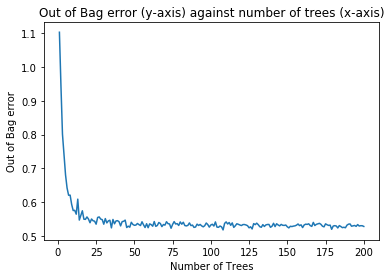

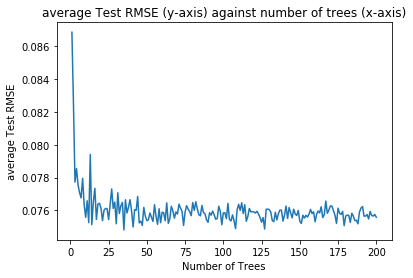

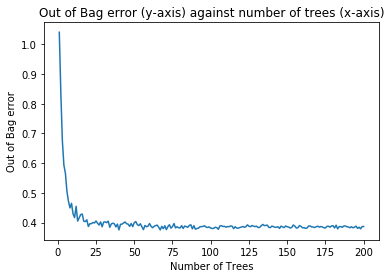

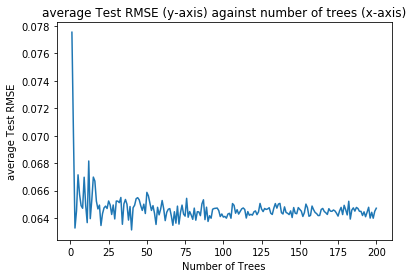

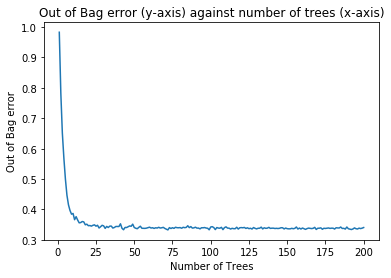

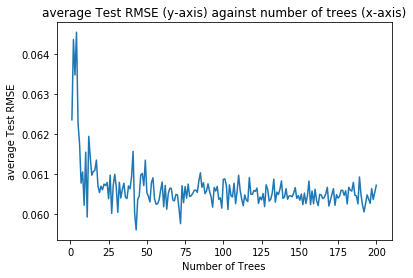

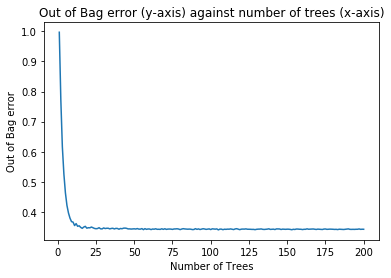

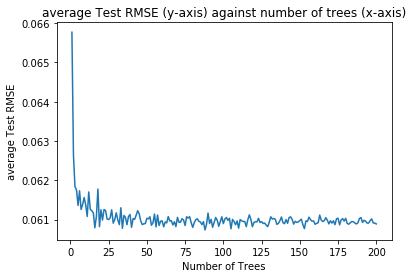

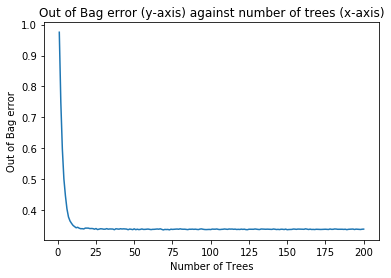

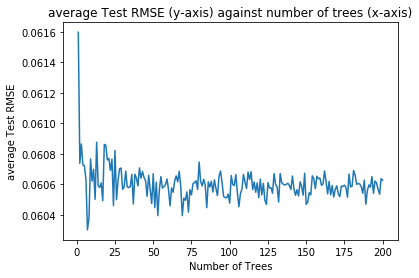

In [22]:
i = 0;
j = 0;
best1 = []
best2 = []
while i < len(features_array):
    total_rmse_per_fold_train = []
    total_rmse_per_fold_test = []
    total_oob_error_per_fold = []
    while j < len(trees_array):
        Num_trees = trees_array[j]
        Num_features = features_array[i]
        model = RandomForestRegressor(n_estimators = Num_trees, max_features = Num_features, 
                              max_depth = Depth_trees, bootstrap = Bootstrap, oob_score=True)
        num_folds = 10
        kf = KFold(n_splits=num_folds)
        rmse_per_fold_train = []
        rmse_per_fold_test = []
        oob_error_per_fold = []
        k = 0
        for trainset, testset in kf.split(X_encoded):
            X_train, X_test = X_encoded[trainset], X_encoded[testset]
            y_train, y_test = Y_encoded_rf[trainset], Y_encoded_rf[testset]
            model.fit(X_train, y_train)
#             rmse_per_fold_train.append(sqrt(mean_squared_error(y_train, model.predict(X_train))))
#             rmse_per_fold_test.append(sqrt(mean_squared_error(y_test, model.predict(X_test)))
            rmse_per_fold_train.append(mean_squared_error(y_train, model.predict(X_train)))
            rmse_per_fold_test.append(mean_squared_error(y_test, model.predict(X_test)))
            oob_error = 1 - model.oob_score_
            oob_error_per_fold.append(oob_error)
        total_rmse_per_fold_train.append(np.sqrt(np.mean(rmse_per_fold_train)))
        total_rmse_per_fold_test.append(np.sqrt(np.mean(rmse_per_fold_test)))
        total_oob_error_per_fold.append(np.mean(oob_error_per_fold))
        print('-----------------------------------------------------')
        print('Number of trees = %d' % Num_trees)
        print('Number of features = %d' % Num_features)
        print('RMSE Training = {}'.format(np.sqrt(np.mean(rmse_per_fold_train))))
        print('RMSE Testing = {}'.format(np.sqrt(np.mean(rmse_per_fold_test))))
        print('Out of Bag error = {}'.format(np.mean(oob_error_per_fold)))
        print('-----------------------------------------------------')
        j = j + 1
    best1.append(np.argmin(total_oob_error_per_fold))
    best2.append(np.argmin(total_rmse_per_fold_test))
    plt.figure()
    plt.plot(trees_array, total_oob_error_per_fold)
    plt.title('Out of Bag error (y-axis) against number of trees (x-axis)')
    plt.xlabel('Number of Trees')
    plt.ylabel('Out of Bag error')
    
    plt.figure()
    plt.plot(trees_array, total_rmse_per_fold_test)
    plt.title('average Test RMSE (y-axis) against number of trees (x-axis)')
    plt.xlabel('Number of Trees')
    plt.ylabel('average Test RMSE')
    j = 0
    i = i + 1

In [23]:
best

[107, 66, 71, 104, 68]

## (2) iii

In [24]:
depth_array = np.arange(1,41)
Best_num_features = 3
Best_num_trees = 4

-----------------------------------------------------
Number of trees = 4
Number of features = 3
Depth of trees = 1
RMSE Training = 0.0974343217355151
RMSE Testing = 0.09751620439308896
Out of Bag error = 0.952103011102572
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 4
Number of features = 3
Depth of trees = 2
RMSE Training = 0.08644544006795733
RMSE Testing = 0.08654136074106585
Out of Bag error = 0.8143774225526184
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 4
Number of features = 3
Depth of trees = 3
RMSE Training = 0.07735465111818647
RMSE Testing = 0.07737562876697861
Out of Bag error = 0.7056191778180725
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 4
Number of features = 3
Depth of trees = 4
RMSE Training = 0.06183715780049229
RMSE Testing 

-----------------------------------------------------
Number of trees = 4
Number of features = 3
Depth of trees = 31
RMSE Training = 0.007970331463159513
RMSE Testing = 0.01637645601717416
Out of Bag error = 0.2555565518522852
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 4
Number of features = 3
Depth of trees = 32
RMSE Training = 0.007925087840295525
RMSE Testing = 0.016151660482342976
Out of Bag error = 0.25228804065757787
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 4
Number of features = 3
Depth of trees = 33
RMSE Training = 0.007833951303442832
RMSE Testing = 0.016337991082092974
Out of Bag error = 0.24948527297888362
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 4
Number of features = 3
Depth of trees = 34
RMSE Training = 0.00843061709747037


Text(0, 0.5, 'average Test RMSE')

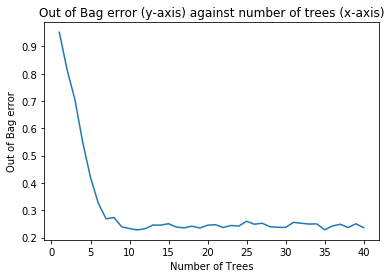

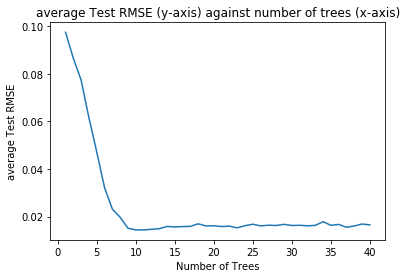

In [25]:
j = 0;
total_rmse_per_fold_train = []
total_rmse_per_fold_test = []
total_oob_error_per_fold = []
while j < len(depth_array):
    depth_trees = depth_array[j]
    model = RandomForestRegressor(n_estimators = Best_num_trees, max_features = Best_num_features, 
                              max_depth = depth_trees, bootstrap = Bootstrap, oob_score=True)
    num_folds = 10
    kf = KFold(n_splits=num_folds)
    rmse_per_fold_train = []
    rmse_per_fold_test = []
    oob_error_per_fold = []
    k = 0
    for trainset, testset in kf.split(X_encoded):
        X_train, X_test = X_encoded[trainset], X_encoded[testset]
        y_train, y_test = Y_encoded_rf[trainset], Y_encoded_rf[testset]
        model.fit(X_train, y_train)
#         rmse_per_fold_train.append(sqrt(mean_squared_error(y_train, model.predict(X_train))))
#         rmse_per_fold_test.append(sqrt(mean_squared_error(y_test, model.predict(X_test))))
        rmse_per_fold_train.append(mean_squared_error(y_train, model.predict(X_train)))
        rmse_per_fold_test.append(mean_squared_error(y_test, model.predict(X_test)))
        oob_error = 1 - model.oob_score_
        oob_error_per_fold.append(oob_error)
    total_rmse_per_fold_train.append(np.sqrt(np.mean(rmse_per_fold_train)))
    total_rmse_per_fold_test.append(np.sqrt(np.mean(rmse_per_fold_test)))
    total_oob_error_per_fold.append(np.mean(oob_error_per_fold))
    print('-----------------------------------------------------')
    print('Number of trees = %d' % Best_num_trees)
    print('Number of features = %d' % Best_num_features)
    print('Depth of trees = %d' % depth_trees)
    print('RMSE Training = {}'.format(np.sqrt(np.mean(rmse_per_fold_train))))
    print('RMSE Testing = {}'.format(np.sqrt(np.mean(rmse_per_fold_test))))
    print('Out of Bag error = {}'.format(np.mean(oob_error_per_fold)))
    print('-----------------------------------------------------')
    j = j + 1
    
best_depth1 = np.argmin(total_oob_error_per_fold)
best_depth2 = np.argmin(total_rmse_per_fold_test)

plt.figure()
plt.plot(depth_array, total_oob_error_per_fold)
plt.title('Out of Bag error (y-axis) against number of trees (x-axis)')
plt.xlabel('Number of Trees')
plt.ylabel('Out of Bag error')

plt.figure()
plt.plot(depth_array, total_rmse_per_fold_test)
plt.title('average Test RMSE (y-axis) against number of trees (x-axis)')
plt.xlabel('Number of Trees')
plt.ylabel('average Test RMSE')    
    


In [26]:
best_depth

10

## (2) iv

In [27]:
best_depth = 12

In [28]:
model = RandomForestRegressor(n_estimators = Best_num_trees, max_features = Best_num_features, 
                              max_depth = best_depth, bootstrap = Bootstrap, oob_score=True)

model.fit(X_encoded,Y_encoded_rf)

importantFeatures = model.feature_importances_
print("Feature Importances for best Random Forest Regression : ", importantFeatures)

Feature Importances for best Random Forest Regression :  [0.33670948 0.26945083 0.27672465 0.00593168 0.11118336]


## Scatter Plots

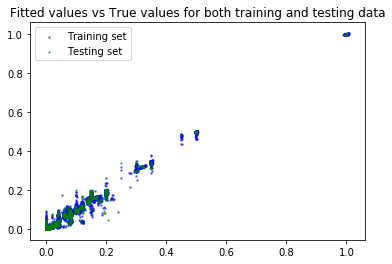

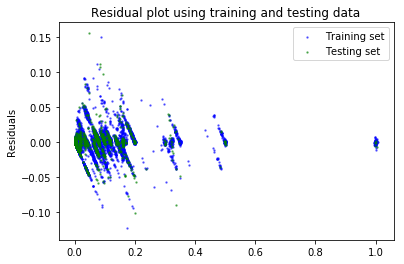

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, Y_encoded_rf, test_size=0.1, random_state=1)

model.fit(X_train, y_train)

pred_train = model.predict(X_train)


# Fitted values vs true values
plt.scatter(y_train, model.predict(X_train), c='b', s=2, alpha=0.5)
plt.scatter(y_test, model.predict(X_test), c='g', s=2, alpha=0.5)
# plt.hlines(y=0,xmin=0,xmax=50)
plt.title('Fitted values vs True values for both training and testing data')
# plt.ylabel('Residuals')
plt.legend(['Training set', 'Testing set'])

plt.figure()
# Residuals vs Fitted values
plt.scatter(model.predict(X_train), y_train - model.predict(X_train), c='b', s=2, alpha=0.5)
plt.scatter(model.predict(X_test), y_test - model.predict(X_test), c='g', s=2, alpha=0.5)
# plt.hlines(y=0,xmin=0,xmax=50)
plt.title('Residual plot using training and testing data')
plt.ylabel('Residuals')
plt.legend(['Training set', 'Testing set'])
# predicted_Y = model.predict(X_encoded)

# residual_values = np.linalg.norm(Y_encoded - model.predict(X_encoded)) ** 2

## (2) v

In [30]:
from sklearn.tree import export_graphviz
import os

X_vis = df[['Week #', 'Day of Week', 'Backup Start Time - Hour of Day', 'Work-Flow-ID', 'File Name']]
Y_vis = df['Size of Backup (GB)']

model = RandomForestRegressor(n_estimators = Best_num_trees, max_features = Best_num_features, 
                              max_depth = 4)

model.fit(X_encoded,Y_encoded_rf)

estimator = model.estimators_[0]

export_graphviz(estimator, out_file='tree.dot', 
                feature_names = X_vis.columns,
                class_names = Y_vis,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

# for i in range(1,25):
#     export_graphviz(model.estimators_[0],
#                 feature_names=X_vis.columns,
#                 filled=True,
#                 rounded=True)
#     os.system('dot -Tpng tree.dot -o'+str(i)+'_tree.png')

## Neural Network

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [ ]:
def model_scatter_plots(model, X_train, y_train, X_test, y_test):

    # Fitted values vs true values
    plt.figure()
    plt.scatter(y_train, model.predict(X_train), c='b', s=2, alpha=0.5)
    plt.scatter(y_test, model.predict(X_test), c='g', s=2, alpha=0.5)
    # plt.hlines(y=0,xmin=0,xmax=50)
    plt.title('Fitted values vs True values for both training and testing data')
    # plt.ylabel('Residuals')
    plt.legend(['Training set', 'Testing set'])
    plt.show()

    plt.figure()
    # Residuals vs Fitted values
    plt.scatter(model.predict(X_train), y_train - model.predict(X_train), c='b', s=2, alpha=0.5)
    plt.scatter(model.predict(X_test), y_test - model.predict(X_test), c='g', s=2, alpha=0.5)
    # plt.hlines(y=0,xmin=0,xmax=50)
    plt.title('Residual plot using training and testing data')
    plt.ylabel('Residuals')
    plt.legend(['Training set', 'Testing set'])
    plt.show()
    # predicted_Y = nn.predict(X_encoded)

In [ ]:
data_new = data.drop(labels=['Backup Time (hour)'], axis=1)
target_data = data_new['Size of Backup (GB)'].values
train_data = data_new.drop(labels=['Size of Backup (GB)'], axis=1).values


In [ ]:
enc = OneHotEncoder(categories='auto')
enc.fit(train_data)
# print(enc.categories_)
# print(np.shape(enc.get_feature_names()))
# print(enc.get_feature_names())

In [ ]:
kf = KFold(n_splits=10)
layer_sizes = np.concatenate((np.array([2, 5, 10]), np.arange(1, 13)*50))
avg_train_rmses_relu = []
avg_test_rmses_relu = []
for size in layer_sizes:
    train_rmses = []
    test_rmses = []
    for trainset, testset in kf.split(train_data):
        nn = MLPRegressor(hidden_layer_sizes=(size,), activation='relu', random_state=0)
        nn.fit(enc.transform(train_data[trainset]), target_data[trainset])
        
        predicted_test = nn.predict(enc.transform(train_data[testset]))
        predicted_train = nn.predict(enc.transform(train_data[trainset]))
        
        train_rmses.append(mean_squared_error(target_data[trainset], predicted_train))
        test_rmses.append(mean_squared_error(target_data[testset], predicted_test))
        
    print('Average training RMSE for hidden layer size {} = '.format(size), np.sqrt(np.mean(train_rmses)))
    print('Average testing RMSE for hidden layer size {} = '.format(size), np.sqrt(np.mean(test_rmses)))
    print(' ')
    
    avg_train_rmses_relu.append(np.sqrt(np.mean(train_rmses)))
    avg_test_rmses_relu.append(np.sqrt(np.mean(test_rmses)))

In [ ]:
kf = KFold(n_splits=10)
layer_sizes = np.concatenate((np.array([2, 5, 10]), np.arange(1, 13)*50))
avg_train_rmses_logistic = []
avg_test_rmses_logistic = []
for size in layer_sizes:
    train_rmses = []
    test_rmses = []
    for trainset, testset in kf.split(train_data):
        nn = MLPRegressor(hidden_layer_sizes=(size,), activation='logistic', random_state=0)
        nn.fit(enc.transform(train_data[trainset]), target_data[trainset])
        
        predicted_test = nn.predict(enc.transform(train_data[testset]))
        predicted_train = nn.predict(enc.transform(train_data[trainset]))
        
        train_rmses.append(mean_squared_error(target_data[trainset], predicted_train))
        test_rmses.append(mean_squared_error(target_data[testset], predicted_test))
        
    print('Average training RMSE for hidden layer size {} = '.format(size), np.sqrt(np.mean(train_rmses)))
    print('Average testing RMSE for hidden layer size {} = '.format(size), np.sqrt(np.mean(test_rmses)))
    print(' ')
    
    avg_train_rmses_logistic.append(np.sqrt(np.mean(train_rmses)))
    avg_test_rmses_logistic.append(np.sqrt(np.mean(test_rmses)))

In [ ]:
kf = KFold(n_splits=10)
layer_sizes = np.concatenate((np.array([2, 5, 10]), np.arange(1, 13)*50))
avg_train_rmses_tanh = []
avg_test_rmses_tanh = []
for size in layer_sizes:
    train_rmses = []
    test_rmses = []
    for trainset, testset in kf.split(train_data):
        nn = MLPRegressor(hidden_layer_sizes=(size,), activation='tanh', random_state=0)
        nn.fit(enc.transform(train_data[trainset]), target_data[trainset])
        
        predicted_test = nn.predict(enc.transform(train_data[testset]))
        predicted_train = nn.predict(enc.transform(train_data[trainset]))
        
        train_rmses.append(mean_squared_error(target_data[trainset], predicted_train))
        test_rmses.append(mean_squared_error(target_data[testset], predicted_test))
        
    print('Average training RMSE for hidden layer size {} = '.format(size), np.sqrt(np.mean(train_rmses)))
    print('Average testing RMSE for hidden layer size {} = '.format(size), np.sqrt(np.mean(test_rmses)))
    print(' ')
    
    avg_train_rmses_tanh.append(np.sqrt(np.mean(train_rmses)))
    avg_test_rmses_tanh.append(np.sqrt(np.mean(test_rmses)))

In [ ]:
plt.figure()
plt.plot(layer_sizes, avg_test_rmses_relu)
plt.plot(layer_sizes, avg_test_rmses_logistic)
plt.plot(layer_sizes, avg_test_rmses_tanh)
plt.legend(['relu', 'logistic', 'tanh'])
plt.xlabel('hidden layer size')
plt.ylabel('average test RMSE')
plt.show()

In [ ]:
print('Best combination: {} hidden layers with ReLU gives RMSE {}'.format(layer_sizes[np.argmin(avg_test_rmses_relu)], 
                                                                          np.min(avg_test_rmses_relu)))

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
best_layer_size = 400
best_activation = 'relu'

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(enc.transform(train_data), target_data, 
                                                    test_size=0.1, random_state=0)

nn = MLPRegressor(hidden_layer_sizes=(best_layer_size,), activation=best_activation, random_state=0)
nn.fit(X_train, y_train)

model_scatter_plots(nn, X_train, y_train, X_test, y_test)

## Predicting backup sizes for each workflow

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [ ]:
data_new = data.drop(labels=['Backup Time (hour)'], axis=1)
target_data = data_new['Size of Backup (GB)'].values
train_data = data_new.drop(labels=['Size of Backup (GB)'], axis=1).values


#### Linear Regression

In [ ]:
data_wf0_enc = X_encoded[np.where(X_encoded[:,1]==0)]
target_wf0_enc = Y_encoded[np.where(X_encoded[:,1]==0)]
data_wf1_enc = X_encoded[np.where(X_encoded[:,1]==1)]
target_wf1_enc = Y_encoded[np.where(X_encoded[:,1]==1)]
data_wf2_enc = X_encoded[np.where(X_encoded[:,1]==2)]
target_wf2_enc = Y_encoded[np.where(X_encoded[:,1]==2)]
data_wf3_enc = X_encoded[np.where(X_encoded[:,1]==3)]
target_wf3_enc = Y_encoded[np.where(X_encoded[:,1]==3)]
data_wf4_enc = X_encoded[np.where(X_encoded[:,1]==4)]
target_wf4_enc = Y_encoded[np.where(X_encoded[:,1]==4)]

In [ ]:
def analyze_wf_se_lr(data, target):

    model = LinearRegression()
    kf = KFold(n_splits=num_folds)
    rmse_per_fold_train = []
    rmse_per_fold_test = []
    for trainset, testset in kf.split(data):
        X_train, X_test = data[trainset], data[testset]
        y_train, y_test = target[trainset], target[testset]
        model.fit(X_train, y_train)
        rmse_per_fold_train.append(mean_squared_error(y_train, model.predict(X_train)))
        rmse_per_fold_test.append(mean_squared_error(y_test, model.predict(X_test)))
    #     print('RMSE Training for fold {} = {}'.format(i, sqrt(mean_squared_error(y_train, model.predict(X_train)))))
    #     print('RMSE Testing for fold {} = {}'.format(i, sqrt(mean_squared_error(y_test, model.predict(X_test)))))
    #     print(' ')
    print('Average train RMSE:', np.sqrt(np.mean(rmse_per_fold_train)))
    print('Average test RMSE:', np.sqrt(np.mean(rmse_per_fold_test)))

In [ ]:
# Workflow 0

analyze_wf_se_lr(data_wf0_enc, target_wf0_enc)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_wf0_enc, target_wf0_enc, test_size=0.1, random_state=0)
model.fit(X_train, y_train)

model_scatter_plots(model, X_train, y_train, X_test, y_test)

In [ ]:
# Workflow 1

analyze_wf_se_lr(data_wf1_enc, target_wf1_enc)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_wf1_enc, target_wf1_enc, test_size=0.1, random_state=0)
model.fit(X_train, y_train)

model_scatter_plots(model, X_train, y_train, X_test, y_test)

In [ ]:
# Workflow 2

analyze_wf_se_lr(data_wf2_enc, target_wf2_enc)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_wf2_enc, target_wf2_enc, test_size=0.1, random_state=0)
model.fit(X_train, y_train)

model_scatter_plots(model, X_train, y_train, X_test, y_test)

In [ ]:
# Workflow 3

analyze_wf_se_lr(data_wf3_enc, target_wf3_enc)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_wf3_enc, target_wf3_enc, test_size=0.1, random_state=0)
model.fit(X_train, y_train)

model_scatter_plots(model, X_train, y_train, X_test, y_test)

In [ ]:
# Workflow 4

analyze_wf_se_lr(data_wf4_enc, target_wf4_enc)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_wf4_enc, target_wf4_enc, test_size=0.1, random_state=0)
model.fit(X_train, y_train)

model_scatter_plots(model, X_train, y_train, X_test, y_test)

#### Polynomial fit

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [ ]:
# Get scalar-encoded data per workflow

data_wf0_se = X_encoded[np.where(X_encoded[:,1]==0)]
target_wf0_se = Y_encoded[np.where(X_encoded[:,1]==0)]
data_wf1_se = X_encoded[np.where(X_encoded[:,1]==1)]
target_wf1_se = Y_encoded[np.where(X_encoded[:,1]==1)]
data_wf2_se = X_encoded[np.where(X_encoded[:,1]==2)]
target_wf2_se = Y_encoded[np.where(X_encoded[:,1]==2)]
data_wf3_se = X_encoded[np.where(X_encoded[:,1]==3)]
target_wf3_se = Y_encoded[np.where(X_encoded[:,1]==3)]
data_wf4_se = X_encoded[np.where(X_encoded[:,1]==4)]
target_wf4_se = Y_encoded[np.where(X_encoded[:,1]==4)]

In [ ]:
# Get data per workflow to be used in one-hot encoding

data_wf0 = train_data[np.where(train_data[:,3]=='work_flow_0')]
target_wf0 = target_data[np.where(train_data[:,3]=='work_flow_0')]
data_wf1 = train_data[np.where(train_data[:,3]=='work_flow_1')]
target_wf1 = target_data[np.where(train_data[:,3]=='work_flow_1')]
data_wf2 = train_data[np.where(train_data[:,3]=='work_flow_2')]
target_wf2 = target_data[np.where(train_data[:,3]=='work_flow_2')]
data_wf3 = train_data[np.where(train_data[:,3]=='work_flow_3')]
target_wf3 = target_data[np.where(train_data[:,3]=='work_flow_3')]
data_wf4 = train_data[np.where(train_data[:,3]=='work_flow_4')]
target_wf4 = target_data[np.where(train_data[:,3]=='work_flow_4')]

In [ ]:
# Define functions to get RMSE's for scalar and one-hot encoded data, with polynomial features.

def analyze_wf_se_poly(data, target, model):

    avg_train_rmse_se = []
    avg_test_rmse_se = []
    for d in degrees:
#         model = LinearRegression()
        kf = KFold(n_splits=num_folds)
        pf = PolynomialFeatures(d)
        data_se_poly = pf.fit_transform(data)

        rmse_per_fold_train_se = []
        rmse_per_fold_test_se = []

        for trainset, testset in kf.split(data_se_poly):
            X_train, X_test = data_se_poly[trainset], data_se_poly[testset]
            y_train, y_test = target[trainset], target[testset]
            model.fit(X_train, y_train)
            rmse_per_fold_train_se.append(mean_squared_error(y_train, model.predict(X_train)))
            rmse_per_fold_test_se.append(mean_squared_error(y_test, model.predict(X_test)))

        avg_train_rmse_se.append(np.sqrt(np.mean(rmse_per_fold_train_se)))
        avg_test_rmse_se.append(np.sqrt(np.mean(rmse_per_fold_test_se)))

        print('Polynomial degree = {}'.format(d))
        print('Average train RMSE (scalar):', np.sqrt(np.mean(rmse_per_fold_train_se)))
        print('Average test RMSE (scalar):', np.sqrt(np.mean(rmse_per_fold_test_se)))
        print(' ')
        
    return avg_train_rmse_se, avg_test_rmse_se
        
def analyze_wf_oh_poly(data, target, model, enc):
    avg_train_rmse_oh = []
    avg_test_rmse_oh = []
    data_oh = enc.transform(data)
    for d in degrees:
        model = LinearRegression()
        kf = KFold(n_splits=num_folds)
        pf = PolynomialFeatures(d)
        data_oh_poly = pf.fit_transform(data_oh)

        rmse_per_fold_train_oh = []
        rmse_per_fold_test_oh = []

        for trainset, testset in kf.split(data_oh_poly):
            X_train, X_test = data_oh_poly[trainset], data_oh_poly[testset]
            y_train, y_test = target[trainset], target[testset]
            model.fit(X_train, y_train)
            rmse_per_fold_train_oh.append(mean_squared_error(y_train, model.predict(X_train)))
            rmse_per_fold_test_oh.append(mean_squared_error(y_test, model.predict(X_test)))

        avg_train_rmse_oh.append(np.sqrt(np.mean(rmse_per_fold_train_oh)))
        avg_test_rmse_oh.append(np.sqrt(np.mean(rmse_per_fold_test_oh)))

        print('Polynomial degree = {}'.format(d))
        print('Average train RMSE (one hot):', np.sqrt(np.mean(rmse_per_fold_train_oh)))
        print('Average test RMSE (one hot):', np.sqrt(np.mean(rmse_per_fold_test_oh)))
        print(' ')
    return avg_train_rmse_oh, avg_test_rmse_oh

In [ ]:
degrees = np.arange(2, 11)

enc = OneHotEncoder()
enc.fit(train_data)

In [ ]:
# Workflow 0 - scalar encoded

model = LinearRegression()
avg_train_rmse_wf0_se, avg_test_rmse_wf0_se = analyze_wf_se_poly(data_wf0_se, target_wf0_se, model)

In [ ]:
# Workflow 0 - one hot encoded

model = LinearRegression()
avg_train_rmse_wf0_oh, avg_test_rmse_wf0_oh = analyze_wf_oh_poly(data_wf0, target_wf0, model, enc)

In [ ]:
# Workflow 1 - scalar encoded

model = LinearRegression()
avg_train_rmse_wf1_se, avg_test_rmse_wf1_se = analyze_wf_se_poly(data_wf1_se, target_wf1_se, model)

In [ ]:
# Workflow 1 - one hot encoded

model = LinearRegression()
avg_train_rmse_wf1_oh, avg_test_rmse_wf1_oh = analyze_wf_oh_poly(data_wf1, target_wf1, model, enc)

In [ ]:
# Workflow 2 - scalar encoded

model = LinearRegression()
avg_train_rmse_wf2_se, avg_test_rmse_wf2_se = analyze_wf_se_poly(data_wf2_se, target_wf2_se, model)

In [ ]:
# Workflow 2 - one hot encoded

model = LinearRegression()
avg_train_rmse_wf2_oh, avg_test_rmse_wf2_oh = analyze_wf_oh_poly(data_wf2, target_wf2, model, enc)

In [ ]:
# Workflow 3 - scalar encoded

model = LinearRegression()
avg_train_rmse_wf3_se, avg_test_rmse_wf3_se = analyze_wf_se_poly(data_wf3_se, target_wf3_se, model)

In [ ]:
# Workflow 3 - one hot encoded

model = LinearRegression()
avg_train_rmse_wf3_oh, avg_test_rmse_wf3_oh = analyze_wf_oh_poly(data_wf3, target_wf3, model, enc)

In [ ]:
# Workflow 4 - scalar encoded

model = LinearRegression()
avg_train_rmse_wf4_se, avg_test_rmse_wf4_se = analyze_wf_se_poly(data_wf4_se, target_wf4_se, model)

In [ ]:
# Workflow 4 - one hot encoded

avg_train_rmse_wf4_oh, avg_test_rmse_wf4_oh = analyze_wf_oh_poly(data_wf4, target_wf4, enc)

In [ ]:
# Plot RMSE vs polynomial degree, scalar encoding

plt.figure()
plt.plot(degrees, avg_train_rmse_wf0)
plt.plot(degrees, avg_train_rmse_wf1)
plt.plot(degrees, avg_train_rmse_wf2)
plt.plot(degrees, avg_train_rmse_wf3)
plt.plot(degrees, avg_train_rmse_wf4)

plt.legend(['wf0', 'wf1', 'wf2', 'wf3', 'wf4'])
plt.show()

plt.figure()
plt.plot(degrees, avg_test_rmse_wf0)
plt.plot(degrees, avg_test_rmse_wf1)
plt.plot(degrees, avg_test_rmse_wf2)
plt.plot(degrees, avg_test_rmse_wf3)
plt.plot(degrees, avg_test_rmse_wf4)

plt.legend(['wf0', 'wf1', 'wf2', 'wf3', 'wf4'])
plt.show()

In [ ]:
# Plot RMSE vs polynomial degree, one hot encoding

plt.figure()
plt.plot(degrees, avg_train_rmse_wf0_oh)
plt.plot(degrees, avg_train_rmse_wf1_oh)
plt.plot(degrees, avg_train_rmse_wf2_oh)
plt.plot(degrees, avg_train_rmse_wf3_oh)
plt.plot(degrees, avg_train_rmse_wf4_oh)

plt.legend(['wf0', 'wf1', 'wf2', 'wf3', 'wf4'])
plt.show()

plt.figure()
plt.plot(degrees, avg_test_rmse_wf0_oh)
plt.plot(degrees, avg_test_rmse_wf1_oh)
plt.plot(degrees, avg_test_rmse_wf2_oh)
plt.plot(degrees, avg_test_rmse_wf3_oh)
plt.plot(degrees, avg_test_rmse_wf4_oh)

plt.legend(['wf0', 'wf1', 'wf2', 'wf3', 'wf4'])
plt.show()

In [ ]:
best_deg = 8


In [ ]:
# Workflow 0

model = LinearRegression()
kf = KFold(n_splits=num_folds)
pf = PolynomialFeatures(best_deg)
data_wf0_enc_poly = pf.fit_transform(data_wf0_enc)

X_train, X_test, y_train, y_test = train_test_split(data_wf0_enc_poly, target_wf0_enc, test_size=0.1, random_state=0)
model.fit(X_train, y_train)

model_scatter_plots(model, X_train, y_train, X_test, y_test)

In [ ]:
# Workflow 1

model = LinearRegression()
kf = KFold(n_splits=num_folds)
pf = PolynomialFeatures(best_deg)
data_wf1_enc_poly = pf.fit_transform(data_wf1_enc)

X_train, X_test, y_train, y_test = train_test_split(data_wf1_enc_poly, target_wf1_enc, test_size=0.1, random_state=0)
model.fit(X_train, y_train)

model_scatter_plots(model, X_train, y_train, X_test, y_test)

In [ ]:
# Workflow 2

model = LinearRegression()
kf = KFold(n_splits=num_folds)
pf = PolynomialFeatures(best_deg)
data_wf2_enc_poly = pf.fit_transform(data_wf2_enc)

X_train, X_test, y_train, y_test = train_test_split(data_wf2_enc_poly, target_wf2_enc, test_size=0.1, random_state=0)
model.fit(X_train, y_train)

model_scatter_plots(model, X_train, y_train, X_test, y_test)

In [ ]:
# Workflow 3

model = LinearRegression()
kf = KFold(n_splits=num_folds)
pf = PolynomialFeatures(best_deg)
data_wf3_enc_poly = pf.fit_transform(data_wf3_enc)

X_train, X_test, y_train, y_test = train_test_split(data_wf3_enc_poly, target_wf3_enc, test_size=0.1, random_state=0)
model.fit(X_train, y_train)

model_scatter_plots(model, X_train, y_train, X_test, y_test)

In [ ]:
# Workflow 4

model = LinearRegression()
kf = KFold(n_splits=num_folds)
pf = PolynomialFeatures(best_deg)
data_wf4_enc_poly = pf.fit_transform(data_wf4_enc)

X_train, X_test, y_train, y_test = train_test_split(data_wf4_enc_poly, target_wf4_enc, test_size=0.1, random_state=0)
model.fit(X_train, y_train)

model_scatter_plots(model, X_train, y_train, X_test, y_test)

In [ ]:
import warnings
warnings.simplefilter("ignore")

In [ ]:
model = Lasso()

avg_train_rmse_wf0_se_lasso, avg_test_rmse_wf0_se_lasso = analyze_wf_se_poly(data_wf0_se, target_wf0_se, model)

In [ ]:
model = Lasso()

avg_train_rmse_wf1_se_lasso, avg_test_rmse_wf1_se_lasso = analyze_wf_se_poly(data_wf1_se, target_wf1_se, model)

In [ ]:
model = Lasso()

avg_train_rmse_wf2_se_lasso, avg_test_rmse_wf2_se_lasso = analyze_wf_se_poly(data_wf2_se, target_wf2_se, model)

In [ ]:
model = Lasso()

avg_train_rmse_wf3_se_lasso, avg_test_rmse_wf3_se_lasso = analyze_wf_se_poly(data_wf3_se, target_wf3_se, model)

In [ ]:
model = Lasso()

avg_train_rmse_wf4_se_lasso, avg_test_rmse_wf4_se_lasso = analyze_wf_se_poly(data_wf4_se, target_wf4_se, model)

In [ ]:
plt.figure()
plt.plot(degrees, avg_train_rmse_wf0_se_lasso)
plt.plot(degrees, avg_train_rmse_wf1_se_lasso)
plt.plot(degrees, avg_train_rmse_wf2_se_lasso)
plt.plot(degrees, avg_train_rmse_wf3_se_lasso)
plt.plot(degrees, avg_train_rmse_wf4_se_lasso)

plt.xlabel('degree of polynomial')
plt.ylabel('average training RMSE')
plt.legend(['wf0', 'wf1', 'wf2', 'wf3', 'wf4'])
plt.show()

plt.figure()
plt.plot(degrees, avg_test_rmse_wf0_se_lasso)
plt.plot(degrees, avg_test_rmse_wf1_se_lasso)
plt.plot(degrees, avg_test_rmse_wf2_se_lasso)
plt.plot(degrees, avg_test_rmse_wf3_se_lasso)
plt.plot(degrees, avg_test_rmse_wf4_se_lasso)

plt.xlabel('degree of polynomial')
plt.ylabel('average testing RMSE')
plt.legend(['wf0', 'wf1', 'wf2', 'wf3', 'wf4'])
plt.show()

## KNN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [ ]:
data_new = data.drop(labels=['Backup Time (hour)'], axis=1)
target_data = data_new['Size of Backup (GB)'].values
train_data = data_new.drop(labels=['Size of Backup (GB)'], axis=1).values

In [ ]:
enc = OneHotEncoder(categories='auto')
enc.fit(train_data)

In [ ]:
# One hot encoding

num_neighbors = np.arange(2, 11)
kf = KFold(num_folds)

avg_train_rmse_oh = []
avg_test_rmse_oh = []

for i in num_neighbors:
    train_rmses = []
    test_rmses = []
    
    for trainset, testset in kf.split(train_data):
        knr = KNeighborsRegressor(n_neighbors=i)
        knr.fit(enc.transform(train_data[trainset]), target_data[trainset])

        predicted_test = knr.predict(enc.transform(train_data[testset]))
        predicted_train = knr.predict(enc.transform(train_data[trainset]))
        
        train_rmses.append(mean_squared_error(target_data[trainset], predicted_train))
        test_rmses.append(mean_squared_error(target_data[testset], predicted_test))
        
    print('Average training RMSE for {} neighbors = '.format(i), np.sqrt(np.mean(train_rmses)))
    print('Average testing RMSE for {} neighbors = '.format(i), np.sqrt(np.mean(test_rmses)))
    print(' ')
    
    avg_train_rmse_oh.append(np.sqrt(np.mean(train_rmses)))
    avg_test_rmse_oh.append(np.sqrt(np.mean(test_rmses)))
    

In [ ]:
# Scalar encoding

num_neighbors = np.arange(2, 11)
kf = KFold(num_folds)

avg_train_rmse_se = []
avg_test_rmse_se = []

for i in num_neighbors:
    train_rmses = []
    test_rmses = []
    
    for trainset, testset in kf.split(X_encoded):
        knr = KNeighborsRegressor(n_neighbors=i)
        knr.fit(X_encoded[trainset], Y_encoded[trainset])

        predicted_test = knr.predict(X_encoded[testset])
        predicted_train = knr.predict(X_encoded[trainset])
        
        train_rmses.append(mean_squared_error(Y_encoded[trainset], predicted_train))
        test_rmses.append(mean_squared_error(Y_encoded[testset], predicted_test))
        
    print('Average training RMSE for {} neighbors = '.format(i), np.sqrt(np.mean(train_rmses)))
    print('Average testing RMSE for {} neighbors = '.format(i), np.sqrt(np.mean(test_rmses)))
    print(' ')
    
    avg_train_rmse_se.append(np.sqrt(np.mean(train_rmses)))
    avg_test_rmses_se.append(np.sqrt(np.mean(test_rmses)))
    

In [ ]:
knr = KNeighborsRegressor(n_neighbors=4)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, Y_encoded, test_size=0.1, random_state=0)
knr.fit(X_train, y_train)

model_scatter_plots(knr, X_train, y_train, X_test, y_test)

In [ ]:
plt.figure()
plt.plot(num_neighbors, avg_train_rmse_se)
plt.plot(num_neighbors, avg_test_rmse_se)
plt.xlabel('num neighbors')
plt.ylabel('rmse')
plt.title('Average RMSE for scalar encoding')
plt.legend(['train', 'test'])
plt.show()

In [ ]:
plt.figure()
plt.plot(num_neighbors, avg_train_rmse_oh)
plt.plot(num_neighbors, avg_test_rmse_oh)
plt.xlabel('num neighbors')
plt.ylabel('rmse')
plt.title('Average RMSE for scalar encoding')
plt.legend(['train', 'test'])
plt.show()